# **Tanzania Water Wells Analysis**

## 1. Overview

Tanzania, as a developing country, struggles with providing clean water to its population of over 57,000,000. There are many water points already established in the country, but some are in need of repair while others have failed altogether.Only 61% of households in Tanzania currently have access to a basic water-supply. Tanzania has had to contend with death and disease as immediate consequences of this, with the burden falling heaviest on women, children, and the poor and vulnerable. The estimated 31,000 deaths each year due to inadequate WASH services are over 10% of preventable deaths in Tanzania, and cost the economy more than $2.4 billion each year in excess medical costs and lost productivity.

## Business Problem
The World Bank aims to alleviate the water crisis in Tanzania by establishing more water wells in the country. They aim to partner with the best organizations and choose the most suitable geographical locations to ensure the best outcome. The model we build is supposed to help make predictions that will inform the World Bank's final decisions.

## Objectives
- To build a classifier that predicts the condition of water well as either functional or non-funtional.
- To determine the regions with more chances of having functional water points for future planning
- To determine the funders funding a high number of functional water points

## Data Understanding
 The dataset used in this analysis is the Tanzanian Water Well dataset, hosted by driven data.
 It is subdivided further in three datasets; Training_set_values, Training_set_labels and
 Test_set_Values.



## 2. Exploratory Data Analysis (EDA)

In [1]:
#Import the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Load the data
training_values =pd.read_csv('training_set_values.csv')
training_labels =pd.read_csv('training_set_labels.csv')
test_set_values =pd.read_csv('Test_set_values.csv')



In [2]:
#Display first five rows of training values
training_values.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [3]:
training_values.shape


(59400, 40)

From running the codes above we can tell that this dataframe contains 59,400 entries (rows) and 40 columns (features).

The next step is to load the training set labels.

In [4]:
# loading training set labels

training_set_labels = pd.read_csv('training_set_labels.csv')
training_set_labels


,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional
...,...,...
59395,60739,functional
59396,27263,functional
59397,37057,functional
59398,31282,functional


In [5]:
training_set_labels['status_group'].value_counts()

,count
status_group,
functional,32259
non functional,22824
functional needs repair,4317


The training set labels, as shown above, are of three categories: 'functional', 'functional needs repair' and ' non-functional'.

In [6]:
training_set_labels.shape

(59400, 2)

The two datasets have the same number of rows. It would however be time-consuming to check almost 60,000 points. Lets assign datasets 'id' as index and merge them.

In [7]:
training_values.set_index('id', inplace=True)  #setting id as an index to train set
training_set_labels.set_index('id', inplace=True)  #setting id as an indes to train set labels

In [8]:
training_df = pd.merge(training_values, training_set_labels, left_index=True, right_index=True)
training_df.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [9]:
training_df.reset_index(inplace=True)    #setting a new index

In [10]:
# Loading the test_values

test_df = pd.read_csv('Test_set_values.csv')
test_df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [11]:
test_df.shape

(14850, 40)

Our test values are 14,850 in total.
Let's run a code that gives a list of all the columns present in the dataframe.

In [12]:
test_df.columns


Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group'],
      dtype='object')

This is a basic overview of each dataset: Training set values: 59,400 observations, 40 variables Test set: 14,850 observations, 40 variables Training set labels: 59,400 observations; which contains our target variable which is 'status_group' which has the following well categories:  'Functional' 'Fuctional Needs Repair' and 'Nonfunctional'

In [13]:
# Displaying column information
training_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55763 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59398 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [14]:
# Checking for null values

training_df.isna().sum()

,0
id,0
amount_tsh,0
date_recorded,0
funder,3637
gps_height,0
installer,3655
longitude,0
latitude,0
wpt_name,2
num_private,0


In [15]:
# Checking the statistical measures for different columns
training_df.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [16]:
training_df['status_group'].value_counts()

,count
status_group,
functional,32259
non functional,22824
functional needs repair,4317


Now that we have loaded all the data and gained a better understanding of the various elements within it, we can move on to the next step of our analysis.

Some columns contail null values, while some share the same information. In this next step we will clean the data by dropping the null/duplicate values so thaat we can run our models easier.

**2.1 Data Cleaning**

**management/management_group/scheme_management columns**

In [17]:
training_df['management'].value_counts()

,count
management,
vwc,40507
wug,6515
water board,2933
wua,2535
private operator,1971
parastatal,1768
water authority,904
other,844
company,685


In [18]:
training_df['scheme_management'].value_counts()

,count
scheme_management,
VWC,36793
WUG,5206
Water authority,3153
WUA,2883
Water Board,2748
Parastatal,1680
Private operator,1063
Company,1061
Other,766


The 'scheme_management' and 'management' columns possess the same information. Since the 'managemen' column possesses lesser null values, we chose to keep it and drop 'scheme_management'.

In [19]:
training_df['management_group'].value_counts()

,count
management_group,
user-group,52490
commercial,3638
parastatal,1768
other,943
unknown,561


In [20]:
training_df.loc[training_df['management_group']=='commercial']['management'].value_counts() # to find sub-groups of this column

,count
management,
private operator,1971
water authority,904
company,685
trust,78


The results above show that the information contained in the 'management_group' column is similar to the content in the 'management' column, hence we decided to drop the 'management_group' column.

In [21]:
# To see the sub-groups in management_group alongside the management column
training_df.groupby(['management_group','management']).count()

id  amount_tsh  date_recorded  funder  \
management_group management                                                   
commercial       company             685         685            685     663   
                 private operator   1971        1971           1971    1957   
                 trust                78          78             78      78   
                 water authority     904         904            904     836   
other            other               844         844            844     837   
                 other - school       99          99             99      99   
parastatal       parastatal         1768        1768           1768    1624   
unknown          unknown             561         561            561     533   
user-group       vwc               40507       40507          40507   37630   
                 water board        2933        2933           2933    2715   
                 wua                2535        2535           2535    2308   
                 wug                6515        6515           6515    6483   

                                   gps_height  installer  longitude  latitude  \
management_group management                                                     
commercial       company                  685        663        685       685   
                 private operator        1971       1959       1971      1971   
                 trust                     78         78         78        78   
                 water authority          904        836        904       904   
other            other                    844        831        844       844   
                 other - school            99         99         99        99   
parastatal       parastatal              1768       1626       1768      1768   
unknown          unknown                  561        527        561       561   
user-group       vwc                    40507      37630      40507     40507   
                 water board             2933       2714       2933      2933   
                 wua                     2535       2309       2535      2535   
                 wug                     6515       6473       6515      6515   

                                   wpt_name  num_private  ...  water_quality  \
management_group management                               ...                  
commercial       company                685          685  ...            685   
                 private operator      1971         1971  ...           1971   
                 trust                   78           78  ...             78   
                 water authority        904          904  ...            904   
other            other                  844          844  ...            844   
                 other - school          99           99  ...             99   
parastatal       parastatal            1768         1768  ...           1768   
unknown          unknown                561          561  ...            561   
user-group       vwc                  40507        40507  ...          40507   
                 water board           2932         2933  ...           2933   
                 wua                   2535         2535  ...           2535   
                 wug                   6514         6515  ...           6515   

                                   quality_group  quantity  quantity_group  \
management_group management                                                  
commercial       company                     685       685             685   
                 private operator           1971      1971            1971   
                 trust                        78        78              78   
                 water authority             904       904             904   
other            other                       844       844             844   
                 other - school               99        99              99   
parastatal       parastatal                 1768   

**quantity_group/quantity**

In [22]:
training_df['quantity_group'].value_counts()

,count
quantity_group,
enough,33186
insufficient,15129
dry,6246
seasonal,4050
unknown,789


In [23]:
training_df['quantity'].value_counts()

,count
quantity,
enough,33186
insufficient,15129
dry,6246
seasonal,4050
unknown,789


In [24]:
training_df['quantity'].isna().sum()

0

In [25]:
training_df['quantity_group'].isna().sum()

0

Both columns have similar information and zero null values, so we decided to drop **quantity_group**

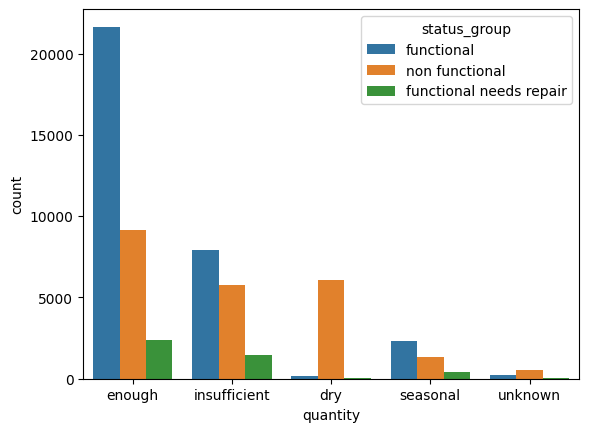

In [26]:
ax = sns.countplot(x='quantity', hue='status_group', data=training_df)
plt.show()

The wells providing enough water are the ones observed to be functional while the dry quantity wells appear to have a high correlation with non-functionality.

In [27]:
# dropping similar columns
training_df.drop(columns=['management_group','scheme_management','quantity_group','source_class','source_type','quality_group',
                'payment_type','extraction_type_class','extraction_type', 'waterpoint_type_group'],inplace=True )

**construction_year column**

In [28]:
training_df['construction_year'].value_counts()

,count
construction_year,
0,20709
2010,2645
2008,2613
2009,2533
2000,2091
2007,1587
2006,1471
2003,1286
2011,1256


****

We decided to divide this column into decades for easier interpretation. Zero shows the values whose year of construction was not recorded.

In [29]:
# creating new column 'decade'

training_df['decade'] = (training_df['construction_year']//10)*10
training_df['decade'].value_counts()

,count
decade,
0,20709
2000,15330
1990,7678
1980,5578
2010,5161
1970,4406
1960,538


In [30]:
# dividing the column into decades

training_df['decade'].replace(to_replace = (1960,1961,1962,1963,1964,1965,1966,1967,1968,1969),
                        value ='60s' , inplace=True)
training_df['decade'].replace(to_replace = (1970,1971,1972,1973,1974,1975,1976,1977,1978,1979),
                        value ='70s' , inplace=True)
training_df['decade'].replace(to_replace = (1980,1981,1982,1983,1984,1985,1986,1987,1988,1989),
                        value ='80s' , inplace=True)
training_df['decade'].replace(to_replace = (1990,1991,1992,1993,1994,1995,1996,1997,1998,1999),
                        value ='90s' , inplace=True)
training_df['decade'].replace(to_replace = (2000,2001,2002,2003,2004,2005,2006,2007,2008,2009),
                        value ='00s' , inplace=True)
training_df['decade'].replace(to_replace = (2010,2011,2012,2013),
                        value ='10s' , inplace=True)


In [31]:
training_df['decade'].value_counts()

,count
decade,
0,20709
00s,15330
90s,7678
80s,5578
10s,5161
70s,4406
60s,538


In [32]:
training_df['construction_year'].replace(to_replace = 0, value = 2000, inplace=True)
#changing the missing values in construction year column

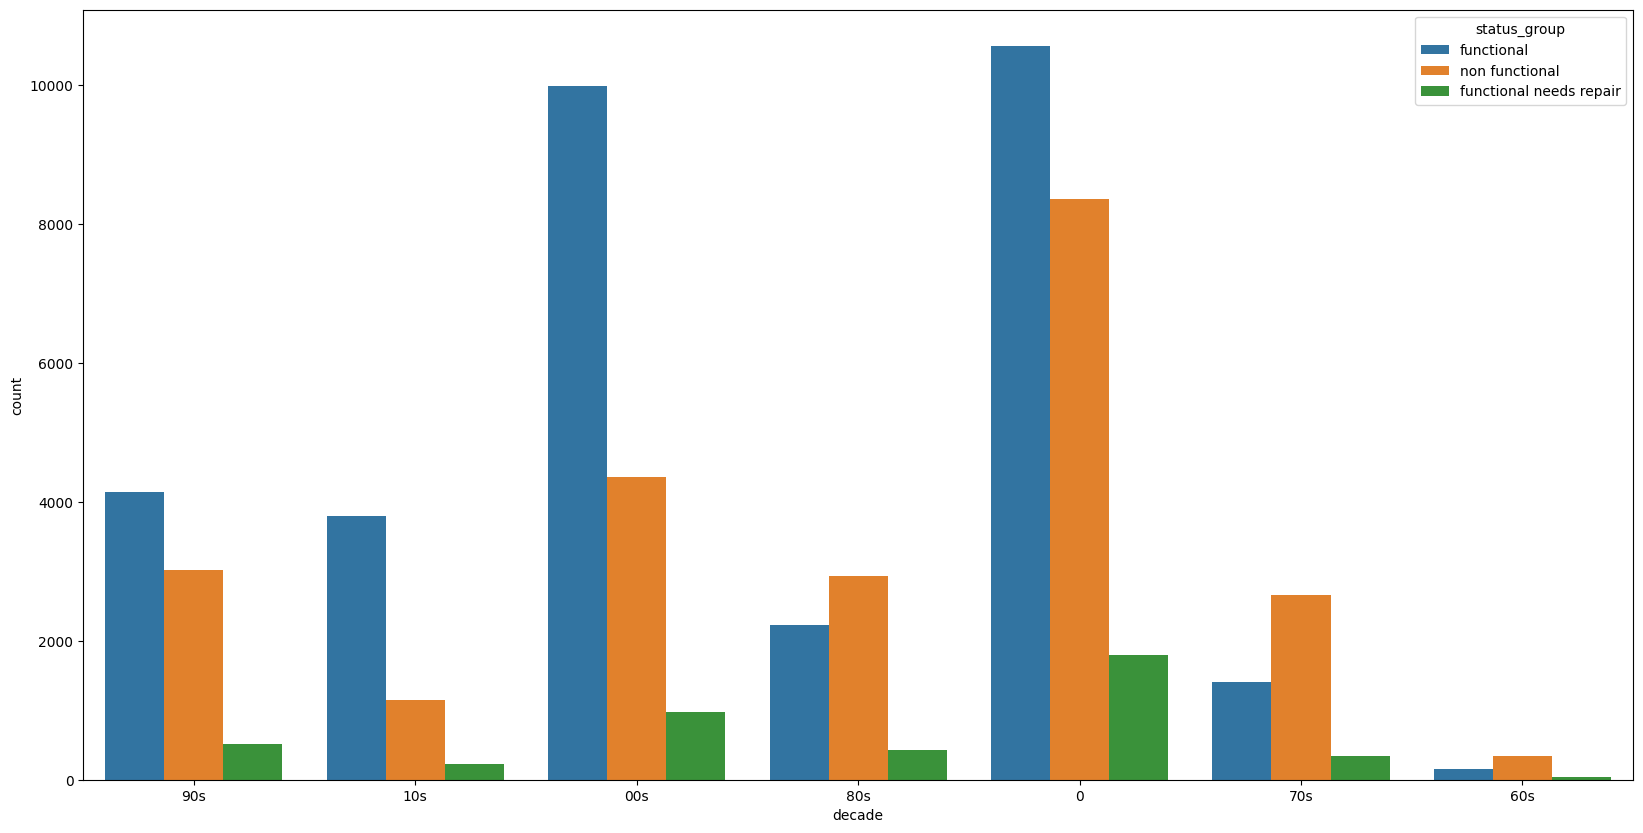

In [33]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='decade', hue="status_group", data=training_df)

**recorded_by column**

In [34]:
training_df['recorded_by'].value_counts()

,count
recorded_by,
GeoData Consultants Ltd,59400


This column would not provide much input to our model since it has one value.

In [35]:
#Dropping the column
training_df.drop(columns=['recorded_by'], inplace=True)


**installer column**

In [36]:
training_df['installer'].isna().sum()

3655

This column possess many NaN and 0 values. For easier computation and understanding, we convert them to "Unknown"

In [37]:
training_df['installer'].fillna('Unknown', inplace=True)

In [38]:
training_df['installer'].value_counts().head(100).sum()

47237

In [39]:
training_df['installer'].replace(to_replace = '0', value ='Unknown' , inplace=True) # filling 0 values with unknown

In [40]:
training_df['installer'].value_counts().head(20) #taking most 20 common installer

,count
installer,
DWE,17402
Unknown,4435
Government,1825
RWE,1206
Commu,1060
DANIDA,1050
KKKT,898
Hesawa,840
TCRS,707


In [41]:
# Creating new dataframe which just picks our desired values

training_df_1 = training_df.loc[training_df['installer']== 'DWE']
training_df_2 = training_df.loc[training_df['installer']== 'Unknown']
training_df_3 = training_df.loc[training_df['installer']== 'Government']
training_df_4 = training_df.loc[training_df['installer']== 'Community']
training_df_5 = training_df.loc[training_df['installer']== 'DANIDA']
training_df_6 = training_df.loc[training_df['installer']== 'RWE']
training_df_7 = training_df.loc[training_df['installer']== 'District council']
training_df_8 = training_df.loc[training_df['installer']== 'Central government']
training_df_9 = training_df.loc[training_df['installer']== 'KKKT']
training_df_10 = training_df.loc[training_df['installer']== 'HESAWA']
training_df_11 = training_df.loc[training_df['installer']== 'TCRS']
training_df_12 = training_df.loc[training_df['installer']== 'world vision']
training_df_13 = training_df.loc[training_df['installer']== 'CES']
training_df_14 = training_df.loc[training_df['installer']== 'Fini Water']
training_df_15 = training_df.loc[training_df['installer']== 'RC Church']
training_df_16 = training_df.loc[training_df['installer']== 'villagers']
training_df_17 = training_df.loc[training_df['installer']== 'LGA']

df_installer = pd.concat([training_df_1,training_df_2,training_df_3,training_df_4,training_df_5,training_df_6,training_df_7,training_df_8,training_df_9,training_df_10,training_df_11,training_df_12,
                          training_df_13,training_df_14,training_df_15,training_df_16,training_df_17], ignore_index=True)

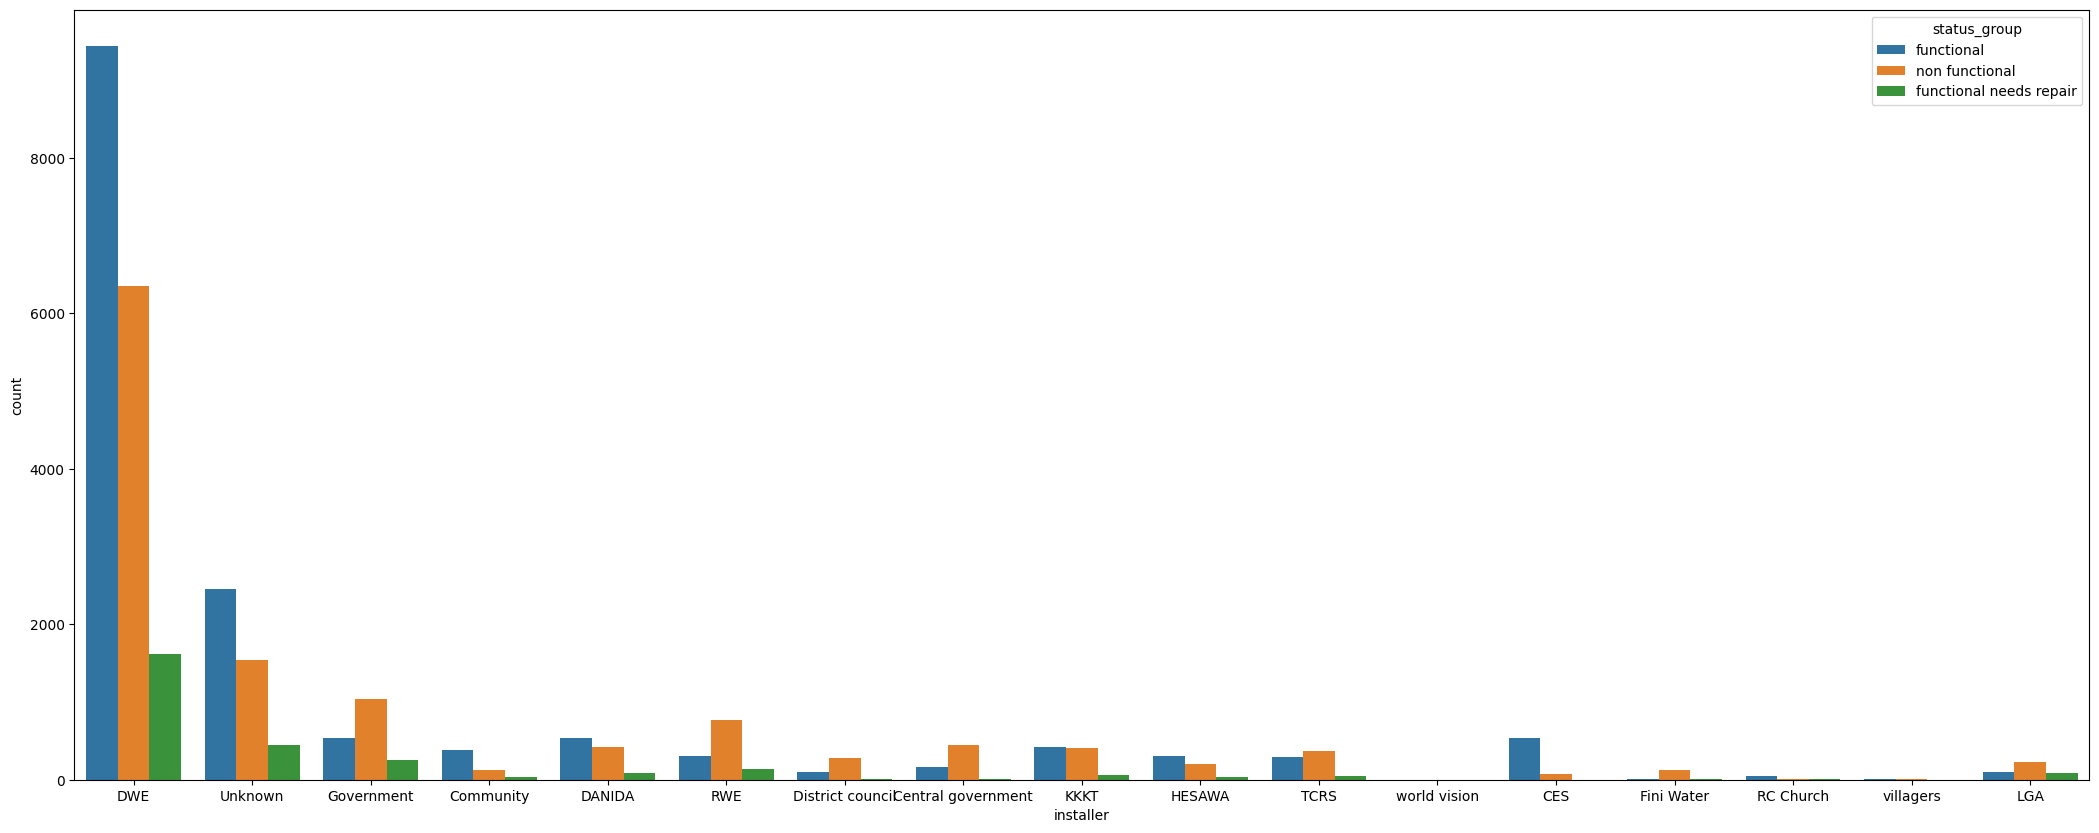

In [42]:
plt.figure(figsize=(26,10))
ax = sns.countplot(x='installer', hue="status_group", data=df_installer)

It can be noted that DWE intalled majority of the functional wells, but also has non-functional wells.

Most wells intalled by the National GOvernment, Central government, RWE and the District Council are non-functional.

In [43]:
training_df['installer_cat'] = training_df['installer'] # To make new categories, creating new column

In [44]:
test_df['installer_cat'] = test_df['installer']

In [45]:
c_ins = ['DWE','Unknown','Government','Community','DANIDA','RWE','District council', 'Central government',
         'KKKT','HESAWA','TCRS', 'world vision', 'Fini Water', 'RC Church','villagers','LGA']


training_df.loc[~training_df["installer_cat"].isin(c_ins), "installer_cat"] = "Others"
# converting the values which has less than 400 value counts to others

In [46]:
training_df['installer_cat'].nunique()

17

We now have a new feature 'installer_cat' with 17 unique categories.

**funder column**

In [47]:
training_df['funder'].isna().sum()

3637

In [48]:
# Filling 0 and null values with Unknown
training_df['funder'].fillna('Unknown', inplace=True)
training_df['funder'].replace(to_replace = '0', value ='Unknown' , inplace=True)

In [49]:
training_df['funder'].value_counts().head(20)

,count
funder,
Government Of Tanzania,9084
Unknown,4418
Danida,3114
Hesawa,2202
Rwssp,1374
World Bank,1349
Kkkt,1287
World Vision,1246
Unicef,1057


We can see that the column is highly categorical. For future encoding we shall use the most common 20 values.

In [50]:
training_df1 = training_df.loc[training_df['funder']== 'Government Of Tanzania']
training_df2 = training_df.loc[training_df['funder']== 'Unknown']
training_df3 = training_df.loc[training_df['funder']== 'Danida']
training_df4 = training_df.loc[training_df['funder']== 'Hesawa']
training_df5 = training_df.loc[training_df['funder']== 'Rwssp']
training_df6 = training_df.loc[training_df['funder']== 'World Bank']
training_df7 = training_df.loc[training_df['funder']== 'Kkkt']
training_df8 = training_df.loc[training_df['funder']== 'World Vision']
training_df9 = training_df.loc[training_df['funder']== 'Unicef']
training_df10 = training_df.loc[training_df['funder']== 'Tasaf']
training_df11 = training_df.loc[training_df['funder']== 'District Council']
training_df12 = training_df.loc[training_df['funder']== 'Dhv']
training_df13 = training_df.loc[training_df['funder']== 'Private Individual']
training_df14 = training_df.loc[training_df['funder']== 'Dwsp']
training_df15 = training_df.loc[training_df['funder']== 'Norad']
training_df16 = training_df.loc[training_df['funder']== 'Germany Republi']
training_df17 = training_df.loc[training_df['funder']== 'Tcrs']
training_df18 = training_df.loc[training_df['funder']== 'Ministry Of Water']
training_df19 = training_df.loc[training_df['funder']== 'Water']
training_df20 = training_df.loc[training_df['funder']== 'Dwe']

df_funder = pd.concat([training_df1,training_df2,training_df3,training_df4,training_df5,training_df6,training_df7,training_df8,training_df9,training_df10,training_df11,training_df12,
                          training_df13,training_df14,training_df15,training_df16,training_df17,training_df18,training_df19,training_df20], ignore_index=True)

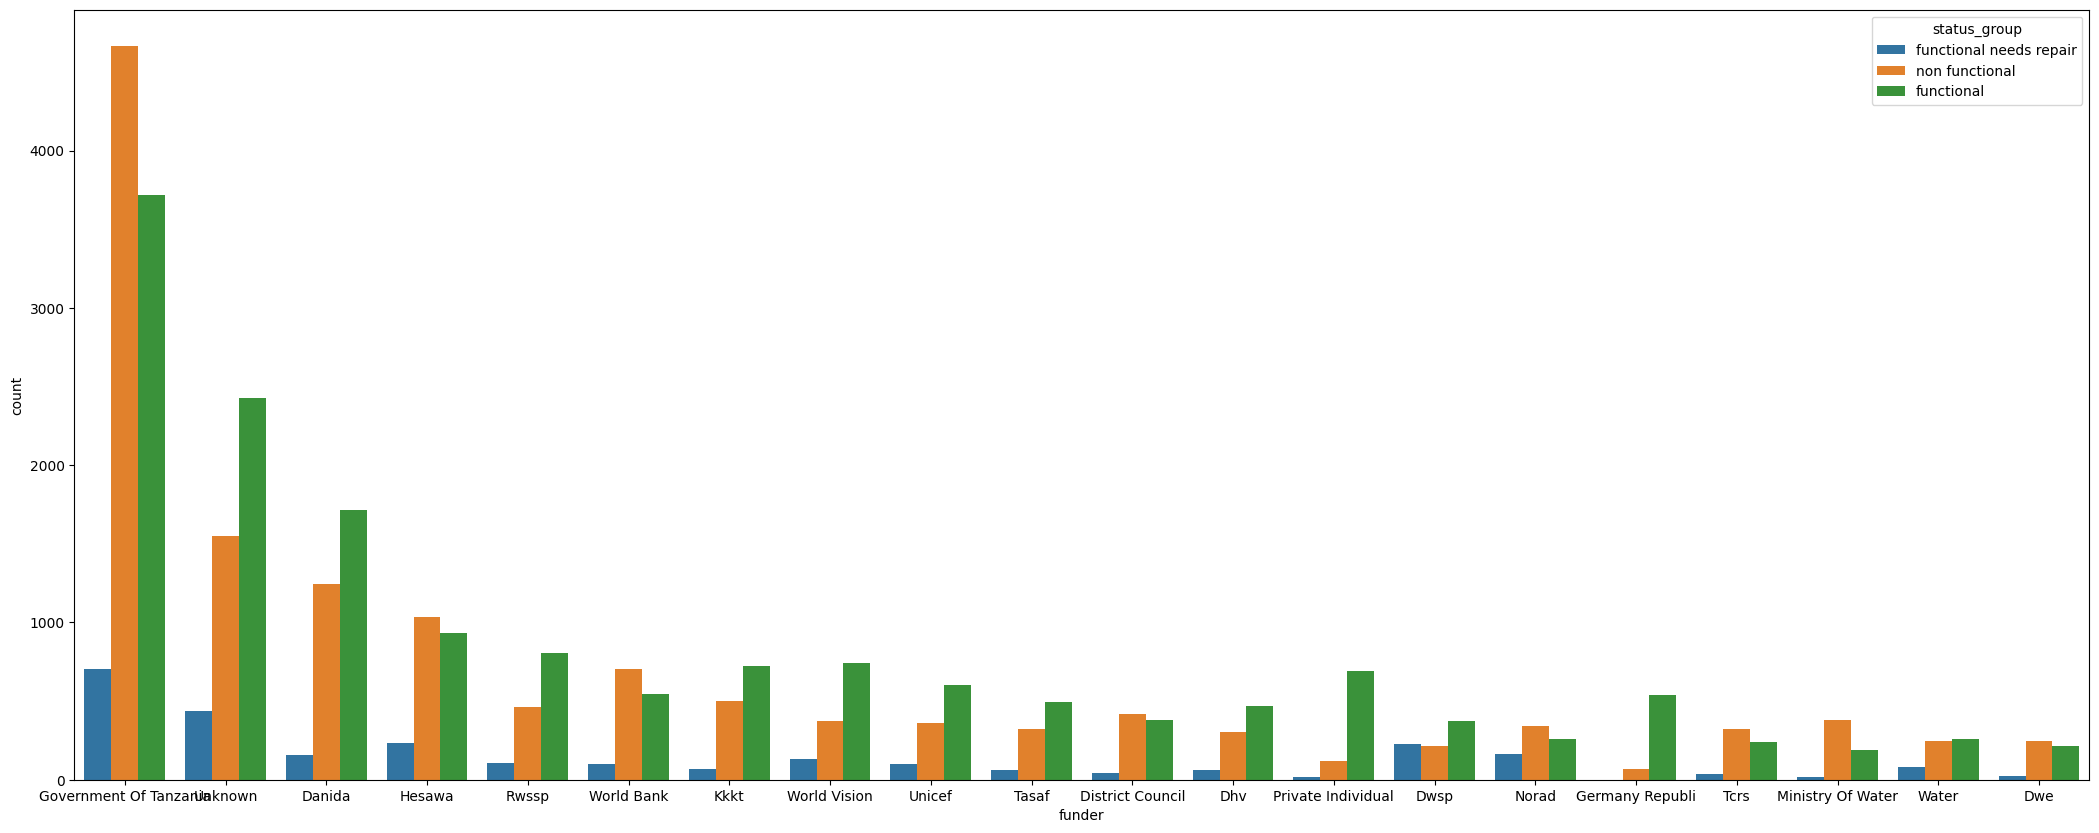

In [51]:
plt.figure(figsize=(26,10))
ax = sns.countplot(x='funder', hue="status_group", data=df_funder)

It is interesting to observe that Government funded water points have the most number of non-functional wells and funtional ones too. The non-functional are however more than the functional.

Water points funded by Private individuals have a considerable difference between the functional and non-funtional wells.

In [52]:
# Collecting values together

training_df['funder_cat'] = training_df['funder'] #creating new column

c_fund = ['Danida','Unknown','Government Of Tanzania','Hesawa','Rwssp','World Bank','Kkkt', 'World Vision',
         'Unicef','Tasaf','District Council', 'Dhv', 'Private Individual', 'Dwsp','Norad','Germany Republi',
         'Tcrs','Ministry Of Water','Water','Dwe']


training_df.loc[~training_df["funder_cat"].isin(c_fund), "funder_cat"] = "Others"

In [53]:
training_df['funder_cat'].nunique()

21

**amount_tsh column**

In [54]:
training_df['amount_tsh'].value_counts()

,count
amount_tsh,
0.0,41639
500.0,3102
50.0,2472
1000.0,1488
20.0,1463
...,...
6300.0,1
120000.0,1
138000.0,1


In [55]:
training_df.loc[training_df['amount_tsh']==0].groupby('status_group').count()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,extraction_type_group,management,payment,water_quality,quantity,source,waterpoint_type,decade,installer_cat,funder_cat
status_group,,,,,,,,,,,,,,,,,,,,,
functional,19706,19706,19706,19706,19706,19706,19706,19706,19706,19706,...,19706,19706,19706,19706,19706,19706,19706,19706,19706,19706
functional needs repair,3048,3048,3048,3048,3048,3048,3048,3048,3048,3048,...,3048,3048,3048,3048,3048,3048,3048,3048,3048,3048
non functional,18885,18885,18885,18885,18885,18885,18885,18885,18883,18885,...,18885,18885,18885,18885,18885,18885,18885,18885,18885,18885


In [56]:
training_df['amount_tsh'].value_counts()/training_df['amount_tsh'].count()

,count
amount_tsh,
0.0,0.700993
500.0,0.052222
50.0,0.041616
1000.0,0.025051
20.0,0.024630
...,...
6300.0,0.000017
120000.0,0.000017
138000.0,0.000017


Approximately 70% of the data in this column has no tangible values. We decided to drop this column because it gives no information that would be useful to our model.

In [57]:
training_df.drop(columns=['amount_tsh'], inplace=True)

**gps_height column**

In [58]:
training_df.groupby('status_group')['gps_height'].mean()

,gps_height
status_group,
functional,740.131188
functional needs repair,627.607135
non functional,574.464774


In [59]:
training_df['gps_height'].value_counts()

,count
gps_height,
0,20438
-15,60
-16,55
-13,55
1290,52
...,...
2378,1
-54,1
2057,1


In [60]:
training_df['gps_height'].value_counts()/training_df['gps_height'].count()

,count
gps_height,
0,0.344074
-15,0.001010
-16,0.000926
-13,0.000926
1290,0.000875
...,...
2378,0.000017
-54,0.000017
2057,0.000017


Approximately 34% of the entries in this column have zero values. Since this column shows the height above sea level, we will not discard it for this reason as those wells could actually be located at sea level.

**population column**

In [61]:
training_df['population'].value_counts()

,count
population,
0,21381
1,7025
200,1940
150,1892
250,1681
...,...
6330,1
5030,1
656,1


In [62]:
training_df.loc[training_df['population']==0].groupby('status_group').count()

,id,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,extraction_type_group,management,payment,water_quality,quantity,source,waterpoint_type,decade,installer_cat,funder_cat
status_group,,,,,,,,,,,,,,,,,,,,,
functional,11274,11274,11274,11274,11274,11274,11274,11274,11274,11274,...,11274,11274,11274,11274,11274,11274,11274,11274,11274,11274
functional needs repair,1775,1775,1775,1775,1775,1775,1775,1775,1775,1775,...,1775,1775,1775,1775,1775,1775,1775,1775,1775,1775
non functional,8332,8332,8332,8332,8332,8332,8332,8331,8332,8332,...,8332,8332,8332,8332,8332,8332,8332,8332,8332,8332


Some funtional water points have recorded zero population, which is not plausible. We shall change these values to the population mean.

In [63]:
 # to see without mean and median without 0 values
 training_df.loc[training_df['population']!=0].describe()



,id,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,38019.000000,38019.000000,38019.000000,38019.000000,38019.000000,38019.000000,38019.000000,38019.000000,38019.000000
mean,37107.559115,969.889634,36.074387,-6.139781,0.740788,16.076988,6.299456,281.087167,1996.908283
std,21406.803661,612.544787,2.586779,2.737733,15.288297,21.597996,11.303334,564.687660,12.425377
min,1.000000,-90.000000,29.607122,-11.649440,0.000000,2.000000,1.000000,1.000000,1960.000000
25%,18514.500000,347.000000,34.715340,-8.388839,0.000000,4.000000,2.000000,40.000000,1988.000000
50%,37128.000000,1135.000000,36.706815,-5.750877,0.000000,10.000000,3.000000,150.000000,2000.000000
75%,55505.500000,1465.000000,37.940149,-3.597016,0.000000,16.000000,5.000000,324.000000,2008.000000
max,74247.000000,2770.000000,40.345193,-1.042375,1776.000000,99.000000,67.000000,30500.000000,2013.000000


In [64]:
training_df['population'].replace(to_replace = 0 , value =281, inplace=True) #changing 0's to mean value

**subvillage column**

In [65]:
training_df['subvillage'].nunique()

19287

In [66]:
training_df.drop(columns=['subvillage'], inplace=True)

This column has many nunique values. We decided to drop it since it provides geographical location that we have in the region column.

**basin column**

In [67]:
training_df['basin'].value_counts()

,count
basin,
Lake Victoria,10248
Pangani,8940
Rufiji,7976
Internal,7785
Lake Tanganyika,6432
Wami / Ruvu,5987
Lake Nyasa,5085
Ruvuma / Southern Coast,4493
Lake Rukwa,2454


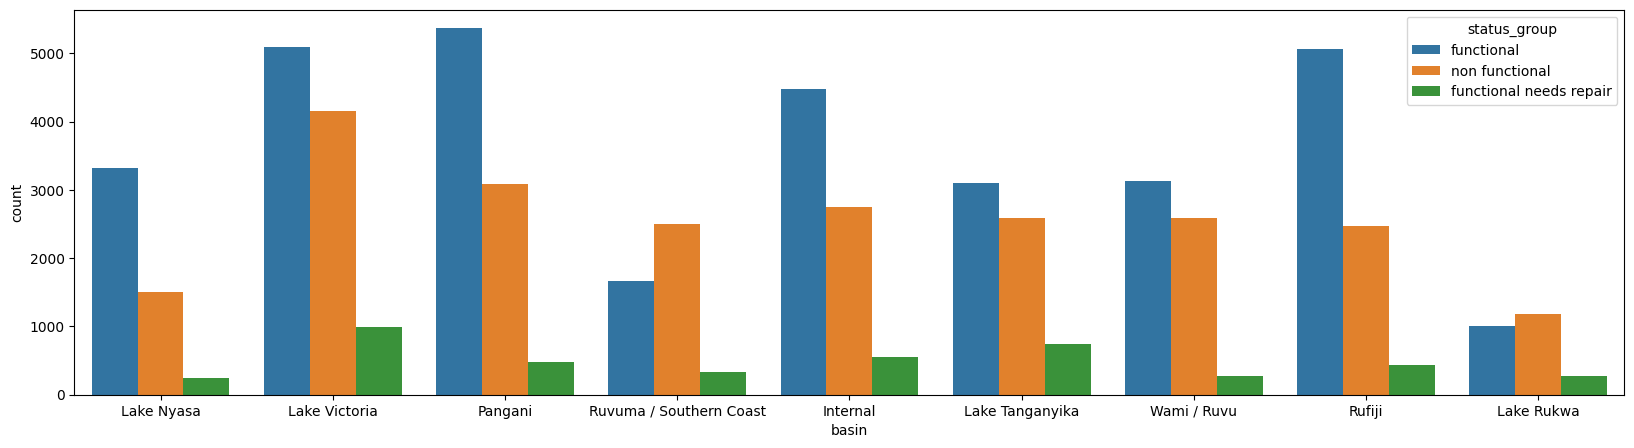

In [68]:
plt.figure(figsize=(20,5))
ax = sns.countplot(x='basin', hue="status_group", data=training_df)

Lake Victoria, Pangani and Rufiji basins have the most functional water points.

This shows a correlation between functionality and geographical water basin.

**num_private column**

In [69]:
training_df['num_private']

,num_private
0,0
1,0
2,0
3,0
4,0
...,...
59395,0
59396,0
59397,0
59398,0


This column does not contain tangible information so we decided to drop it.

In [70]:
training_df.drop(columns=['num_private'], inplace=True)

**district_code column**

In [71]:
training_df['district_code'].dtypes

dtype('int64')

In [72]:
training_df['district_code'].value_counts()

,count
district_code,
1,12203
2,11173
3,9998
4,8999
5,4356
6,4074
7,3343
8,1043
30,995


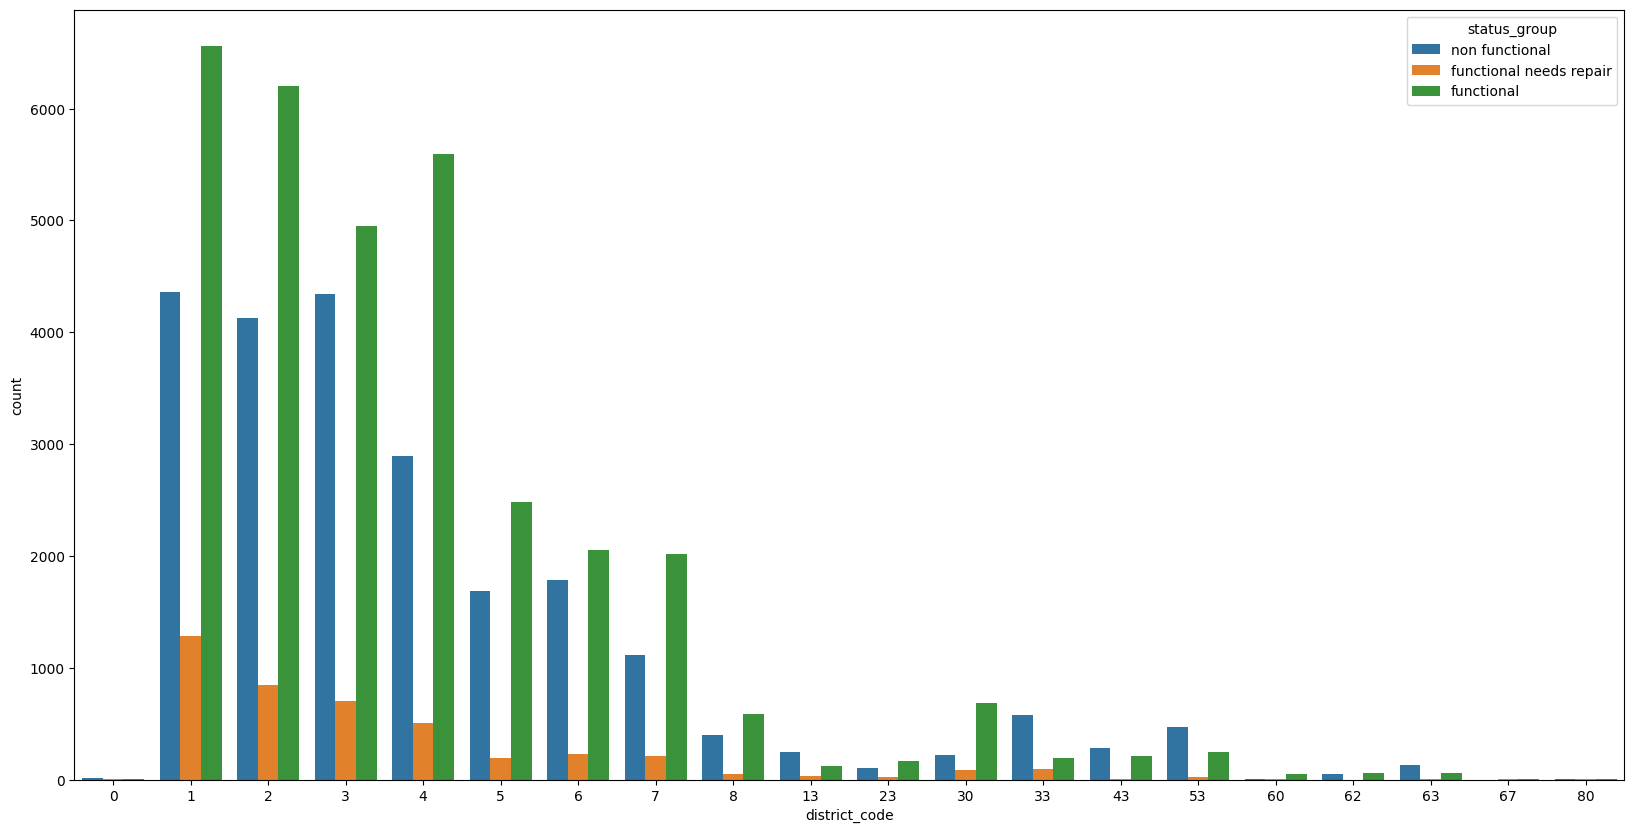

In [73]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='district_code', hue="status_group", data=training_df)

Each district is represented by a district code. Most districts have more functional than non-functional water points.

**public_meeting column**

In [74]:
training_df['public_meeting'].value_counts()

,count
public_meeting,
True,51011
False,5055


In [75]:
training_df['public_meeting'].isna().sum()

3334

There are 3334 null values in this column which we convert to the most common data, wich is True.

In [76]:
training_df['public_meeting'].fillna(value=True, inplace=True)

**permit column**

In [77]:
training_df['permit'].value_counts()

,count
permit,
True,38852
False,17492


In [78]:
training_df['permit'].isna().sum()

3056

In [79]:
training_df['permit'].fillna(value=True, inplace=True)

This column shows whether a water point possesses a permit or not. We changed the null values to True since they were higher.

In [80]:
training_df.columns


Index(['id', 'date_recorded', 'funder', 'gps_height', 'installer', 'longitude',
       'latitude', 'wpt_name', 'basin', 'region', 'region_code',
       'district_code', 'lga', 'ward', 'population', 'public_meeting',
       'scheme_name', 'permit', 'construction_year', 'extraction_type_group',
       'management', 'payment', 'water_quality', 'quantity', 'source',
       'waterpoint_type', 'status_group', 'decade', 'installer_cat',
       'funder_cat'],
      dtype='object')

In [81]:
training_df['wpt_name']

,wpt_name
0,none
1,Zahanati
2,Kwa Mahundi
3,Zahanati Ya Nanyumbu
4,Shuleni
...,...
59395,Area Three Namba 27
59396,Kwa Yahona Kuvala
59397,Mashine
59398,Mshoro


In [82]:
training_df.drop(columns=['wpt_name','scheme_name'], inplace=True)

# EDA Findings


- Generally, higher population areas have higher number of functional wells.
- Some areas have a higher probability of having access to clean water especially, if they are near the right basins.
- Dar es Salaam is one of the highest populated cities but 35% of good water quality points are non-functional.
- Wells which are funded by government are mostly non-functional.
- Most of water points which central government and district council installed are non-functional.



### MODELING

In this step, we apply a **predicitive** modeling process using scikit-learn. The aim is to build a model with the best performance on predicting our target ('status_group') using the features of unseen data.

First, we'll perform a **train-test-split** to ensure we are fitting the model with the training dataset and evaluating it with the testing dataset.

To evaluate the model performance, we will inspect **metrics** in terms of accuracy, MSE and ----- for both the train and test data.

In [83]:
# importing necessary libraries


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score


from sklearn.model_selection import train_test_split, GridSearchCV

import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [84]:
# creating copy of the original cleaned df to protect original data
training_df1 = training_df.copy()

In the modelling process, we need to use a **scaler** for columns with numeric values and **encoder** for the columns with categorical values. We decided to split these columns.

In [85]:
cat_col = ['basin','region','extraction_type_group','management','payment','water_quality','quantity',
               'source','waterpoint_type','decade','installer_cat','funder_cat']

In [86]:
num_col = ['gps_height','longitude','latitude','district_code','population','public_meeting','permit']

### **Defining Target**

In order to initialize our model, the target variables were assigned the values 0, 1 and 2.


In [87]:
target_status_group = {'functional':0,
                   'non functional': 2,
                   'functional needs repair': 1}
training_df['status_group'] = training_df['status_group'].replace(target_status_group)

In [88]:
training_df['status_group'].value_counts()

,count
status_group,
0,32259
2,22824
1,4317


Note:

0 == functional water points
1 == functional but needs repair
2 == non-functional water points

We decided to combine 0 and 1 to stand for all the funtional water points as 1 and the non-functional water points 0.


A new csv file was created containing the cleaned data.

In [89]:
training_df.to_csv('clean_data.csv')
training_df = pd.read_csv('clean_data.csv')

In [90]:
#combining and converting the labels
target_status_group = {0:1, 1:1, 2:0}
training_df['status_group'] = training_df['status_group'].replace(target_status_group)

In [91]:
training_df['status_group'].value_counts()

,count
status_group,
1,36576
0,22824


1 shows the functional water points(including those that need repair)

0 shows non-functional.

**Creating the Model**

***1. Perfoming a Train-test split***

In [92]:
# importing necessary libraries
from os.path import samefile

X = training_df.drop(columns=['status_group'], axis=1)
y = training_df['status_group']


In [93]:
# importing the train_test_split function
from sklearn.model_selection import train_test_split

# splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Performing the train-test split forms our baseline.

***2. Pre-process the Data***

We are going to create a `Logistic Regression` model.

Feature values have to be studied further to apply the right scaler and encoder.

In [94]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings("ignore")


scaler = MinMaxScaler()
encoder = OneHotEncoder()




In [95]:
X_train.isna().sum()

,0
Unnamed: 0,0
id,0
date_recorded,0
funder,0
gps_height,0
installer,0
longitude,0
latitude,0
basin,0
region,0


In [96]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47520 entries, 3607 to 56422
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             47520 non-null  int64  
 1   id                     47520 non-null  int64  
 2   date_recorded          47520 non-null  object 
 3   funder                 47520 non-null  object 
 4   gps_height             47520 non-null  int64  
 5   installer              47520 non-null  object 
 6   longitude              47520 non-null  float64
 7   latitude               47520 non-null  float64
 8   basin                  47520 non-null  object 
 9   region                 47520 non-null  object 
 10  region_code            47520 non-null  int64  
 11  district_code          47520 non-null  int64  
 12  lga                    47520 non-null  object 
 13  ward                   47520 non-null  object 
 14  population             47520 non-null  int64  
 15  publ

In [97]:
X_train_cat = X_train.select_dtypes(include='object')
X_train_num = X_train.select_dtypes(exclude=['object', 'bool'])

In [98]:
X_train_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47520 entries, 3607 to 56422
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         47520 non-null  int64  
 1   id                 47520 non-null  int64  
 2   gps_height         47520 non-null  int64  
 3   longitude          47520 non-null  float64
 4   latitude           47520 non-null  float64
 5   region_code        47520 non-null  int64  
 6   district_code      47520 non-null  int64  
 7   population         47520 non-null  int64  
 8   construction_year  47520 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.6 MB


In [99]:
# Convert all columns in X_train_cat to string type
X_train_cat = X_train_cat.astype(str)

# use OneHotEncoder to conver categorical variables into dummy variables

ohe = OneHotEncoder(handle_unknown= "ignore", sparse_output=False)

ohe.fit(X_train_cat)
X_train_ohe = pd.DataFrame(
    ohe.transform(X_train_cat),
    columns=ohe.get_feature_names_out(X_train_cat.columns), # Use get_feature_names_out to get correct column names
    index=X_train_cat.index)

X_train_ohe.head()

,date_recorded_2004-01-07,date_recorded_2004-03-01,date_recorded_2004-03-06,date_recorded_2004-04-01,date_recorded_2004-05-01,date_recorded_2004-06-01,date_recorded_2004-07-01,date_recorded_2004-08-01,date_recorded_2004-09-01,date_recorded_2004-12-01,...,funder_cat_Others,funder_cat_Private Individual,funder_cat_Rwssp,funder_cat_Tasaf,funder_cat_Tcrs,funder_cat_Unicef,funder_cat_Unknown,funder_cat_Water,funder_cat_World Bank,funder_cat_World Vision
3607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50870,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20413,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52806,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
50091,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


These are very many columns.

We'll now use MinMaxScaler from scikit-learn with defult prametrs to create  maximum value of 1 and a minimum value of 0, which will work well with our binary one-hot-encoded data.

In [100]:
scaler.fit(X_train_num)
X_train_scaled = pd.DataFrame(
    scaler.transform(X_train_num),
    # index is important to ensure we can concatenate with other columns
    index=X_train_num.index,
    columns=X_train_num.columns
)
X_train_scaled

,Unnamed: 0,id,gps_height,longitude,latitude,region_code,district_code,population,construction_year
3607,0.060725,0.006115,0.760678,0.878073,0.637112,0.204082,0.0125,0.005213,0.716981
50870,0.856412,0.006869,0.022238,0.880156,0.508598,0.000000,0.0750,0.009181,0.754717
20413,0.343659,0.190526,0.022238,0.805545,0.220458,0.112245,0.0750,0.009181,0.754717
52806,0.889005,0.638544,0.022238,0.844227,0.242006,0.112245,0.0875,0.009181,0.754717
50091,0.843297,0.017348,0.383339,0.917896,0.481453,0.040816,0.0125,0.003902,0.698113
...,...,...,...,...,...,...,...,...,...
54343,0.914881,0.922933,0.137663,0.901399,0.246765,0.040816,0.0500,0.008328,0.660377
38158,0.642401,0.161353,0.637487,0.855902,0.161367,0.102041,0.0625,0.001115,0.528302
860,0.014478,0.481878,0.017649,0.966024,0.534671,0.030612,0.0625,0.032755,0.849057
15795,0.265914,0.665939,0.022238,0.850574,0.733278,0.163265,0.0750,0.009181,0.754717


We now have 7 columns which are more practical to work with.

The next step is to concatenate everything together.

In [101]:
X_train_full = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_train_full

,date_recorded_2004-01-07,date_recorded_2004-03-01,date_recorded_2004-03-06,date_recorded_2004-04-01,date_recorded_2004-05-01,date_recorded_2004-06-01,date_recorded_2004-07-01,date_recorded_2004-08-01,date_recorded_2004-09-01,date_recorded_2004-12-01,...,funder_cat_World Vision,Unnamed: 0,id,gps_height,longitude,latitude,region_code,district_code,population,construction_year
3607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.060725,0.006115,0.760678,0.878073,0.637112,0.204082,0.0125,0.005213,0.716981
50870,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.856412,0.006869,0.022238,0.880156,0.508598,0.000000,0.0750,0.009181,0.754717
20413,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.343659,0.190526,0.022238,0.805545,0.220458,0.112245,0.0750,0.009181,0.754717
52806,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.889005,0.638544,0.022238,0.844227,0.242006,0.112245,0.0875,0.009181,0.754717
50091,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.843297,0.017348,0.383339,0.917896,0.481453,0.040816,0.0125,0.003902,0.698113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54343,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.914881,0.922933,0.137663,0.901399,0.246765,0.040816,0.0500,0.008328,0.660377
38158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.642401,0.161353,0.637487,0.855902,0.161367,0.102041,0.0625,0.001115,0.528302
860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.014478,0.481878,0.017649,0.966024,0.534671,0.030612,0.0625,0.032755,0.849057
15795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.265914,0.665939,0.022238,0.850574,0.733278,0.163265,0.0750,0.009181,0.754717


**FITTING A MODEL**

In [102]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
model_log = logreg.fit(X_train_full, y_train)
model_log

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

Our model was about 87% correct on our training data!

### Model Evaluation

**Performance on Training Data**

In [103]:
y_pred_train = logreg.predict(X_train_full)

print(f"Accuracy: {accuracy_score(y_train, y_pred_train)}")
print("Confusion Matrix:")
print(confusion_matrix(y_train, y_pred_train))
print("Classification Report:")
print(classification_report(y_train, y_pred_train))

Accuracy: 0.8711489898989899
Confusion Matrix:
[[14231  4021]
 [ 2102 27166]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.78      0.82     18252
           1       0.87      0.93      0.90     29268

    accuracy                           0.87     47520
   macro avg       0.87      0.85      0.86     47520
weighted avg       0.87      0.87      0.87     47520



**Performance on Test Data**

In [104]:
training_feature_names = X_train_full.columns
training_feature_names

Index(['date_recorded_2004-01-07', 'date_recorded_2004-03-01',
       'date_recorded_2004-03-06', 'date_recorded_2004-04-01',
       'date_recorded_2004-05-01', 'date_recorded_2004-06-01',
       'date_recorded_2004-07-01', 'date_recorded_2004-08-01',
       'date_recorded_2004-09-01', 'date_recorded_2004-12-01',
       ...
       'funder_cat_World Vision', 'Unnamed: 0', 'id', 'gps_height',
       'longitude', 'latitude', 'region_code', 'district_code', 'population',
       'construction_year'],
      dtype='object', length=6316)

In [105]:
#Handling Categorical Data

X_test_cat= X_test.select_dtypes(include='object')
X_test_ohe = pd.DataFrame(
    ohe.transform(X_test_cat),
    index=X_test_cat.index,
    columns=np.hstack(ohe.categories_)
)

# Normalization
# Use X_test instead of X_train
X_test_num = X_test.select_dtypes(exclude=['object', 'bool']) # Changed from X_train to X_test
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test_num),
    index=X_test_num.index,
    columns=X_test_num.columns
)

# Concatenating categorical and numeric data
X_test_full = pd.concat([X_test_scaled, X_test_ohe], axis=1)
X_test_full

,Unnamed: 0,id,gps_height,longitude,latitude,region_code,district_code,population,construction_year,2004-01-07,...,Others,Private Individual,Rwssp,Tasaf,Tcrs,Unicef,Unknown,Water,World Bank,World Vision
2980,0.050169,0.499657,0.022238,0.792800,0.691285,0.163265,0.0625,0.009181,0.754717,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5246,0.088318,0.195698,0.022238,0.813797,0.575521,0.132653,0.0750,0.009181,0.754717,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22659,0.381471,0.843226,0.613484,0.879616,0.635858,0.204082,0.0125,0.004820,0.905660,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39888,0.671526,0.620267,0.022238,0.821432,0.222333,0.112245,0.0750,0.009181,0.754717,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13361,0.224936,0.634140,0.413696,0.848108,0.619679,0.122449,0.0125,0.007672,0.962264,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17841,0.300359,0.351422,0.648782,0.857320,0.159686,0.102041,0.0625,0.017345,0.773585,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20222,0.340443,0.012378,0.675256,0.908293,0.720815,0.010204,0.0250,0.004885,0.566038,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40219,0.677099,0.639002,0.022238,0.757066,0.786349,0.173469,0.3750,0.009181,0.754717,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19599,0.329955,0.823306,0.248853,0.931824,0.479579,0.040816,0.0750,0.000000,0.830189,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [106]:
# Assuming 'ohe' was fitted on X_train previously
training_feature_names = X_train.select_dtypes(include='object').columns

# Get missing features in X_test
missing_features = set(training_feature_names) - set(X_test_cat.columns)

# Add missing features to X_test_cat filled with a placeholder (e.g., 'Missing')
for feature in missing_features:
    X_test_cat[feature] = 'Missing'

# Ensure the order of columns matches the training data
X_test_cat = X_test_cat[training_feature_names]

# Now proceed with the transformation
X_test_ohe = pd.DataFrame(
    ohe.transform(X_test_cat),
    index=X_test_cat.index,
    columns=np.hstack(ohe.categories_)
)


In [107]:
# Get the feature names from both training and test sets
training_feature_names = X_train_full.columns
test_feature_names = X_test_full.columns

# Find the features that are in the training set but not in the test set
missing_in_test = set(training_feature_names) - set(test_feature_names)

# Find the features that are in the test set but not in the training set
missing_in_train = set(test_feature_names) - set(training_feature_names)

# Add missing features to the test set, filled with a placeholder (e.g., 0)
for feature in missing_in_test:
    X_test_full[feature] = 0

# Add missing features to the training set, filled with a placeholder (e.g., 0)
for feature in missing_in_train:
    X_train_full[feature] = 0

# Ensure the order of columns is the same in both dataframes
X_train_full = X_train_full[training_feature_names]
X_test_full = X_test_full[training_feature_names]

In [108]:
y_pred_test = logreg.predict(X_test_full)
test_residuals = np.abs(y_test - y_pred_test)
print(pd.Series(test_residuals, name="Residuals (counts)").value_counts())
print()
print(pd.Series(test_residuals, name="Residuals (proportions)").value_counts(normalize=True))

Residuals (counts)
0    7308
1    4572
Name: count, dtype: int64

Residuals (proportions)
0    0.615152
1    0.384848
Name: proportion, dtype: float64


In [109]:
print(f"Accuracy: {accuracy_score(y_test, y_pred_test)}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))
print("Classification Report:")
print(classification_report(y_test, y_pred_test))


Accuracy: 0.6151515151515151
Confusion Matrix:
[[   0 4572]
 [   0 7308]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4572
           1       0.62      1.00      0.76      7308

    accuracy                           0.62     11880
   macro avg       0.31      0.50      0.38     11880
weighted avg       0.38      0.62      0.47     11880



- As seen above, the model's **accuracy** is higher with the train set (87%) than the test set(62%). This means our model is overfitting to the training data  


- The Confusion Matrix and Classification report show that the model is better at predicting actual functional wells (**recall** for functional wells is **1.00**)

Let's plot a confusion matrix for better visualization.

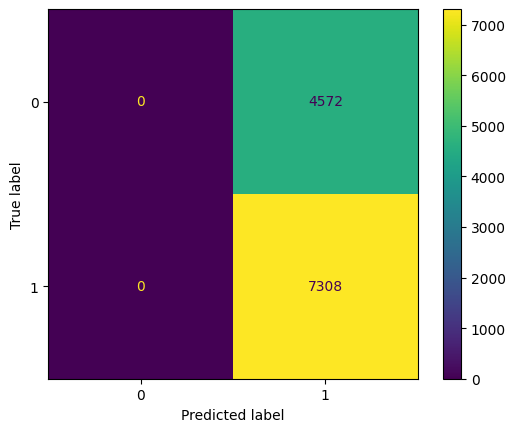

In [110]:
from sklearn.metrics import ConfusionMatrixDisplay

# Plot the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()


7308 wells that our model predicted to be functional were actually functional. Our main concern is the 4572 wells which were predicted to be funtional but were not.


In [ ]:
scores = cross_val_score(logreg, X_train_full, y_train, cv=5)
print(scores)
print(scores.mean())

### **DECISION TREE CLASSIFIER**

Our logistic regression model gave a 0.82 roc-auc score. We will try to improve this using different models, and the first trial is the Decision Tree Classifier.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score

# Training the Decision Tree model
dt = DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=5,
                            random_state=42, class_weight='balanced')

dt.fit(X_train_full, y_train)

In [ ]:
# Making Predictions
y_pred_dt = dt.predict(X_test_full)

#Evaluating the Decision Tree model
print("Decision Tree Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt)}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))



Interpretation

- The model's accuracy is 0.64 for the test data, which is slighltly higher compared to our Logistic Regression model's accuracy of 0.62.
- For this reason, the Decision Tree Classifier is the preferred modelling approach.
